# 가설검정의 이해

## 통계적 가설검정의 이해

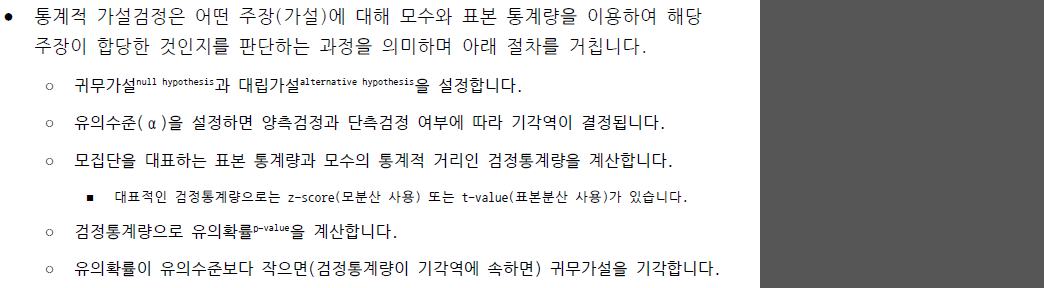

## 가설검정 관련 용어

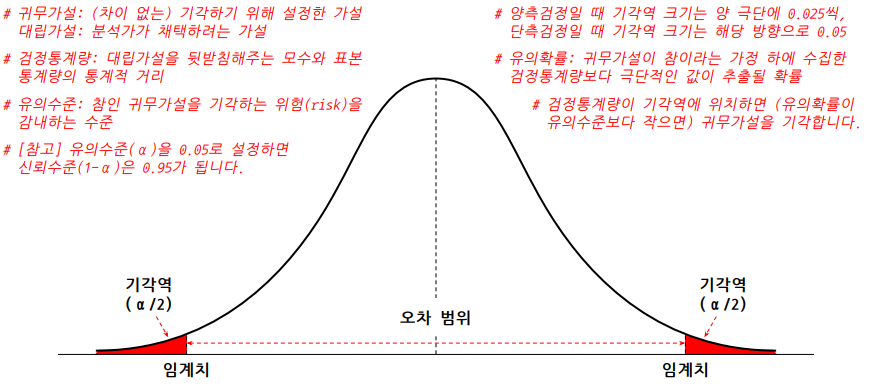

## 가설검정 판단 기준

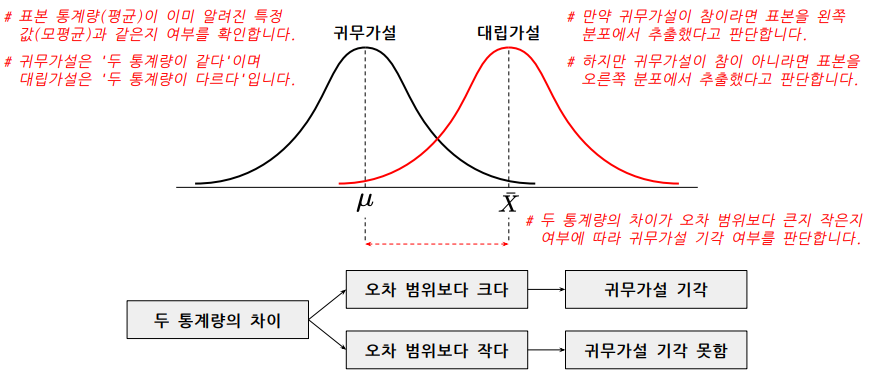

## [참고] 검정력의 이해

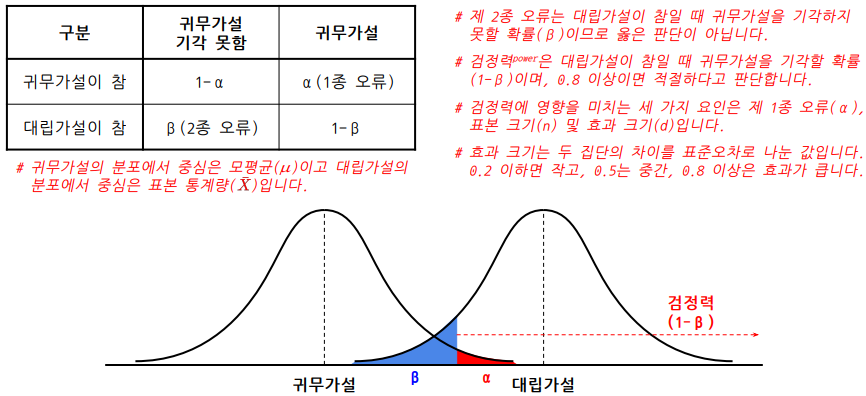

## 단측검정과 양측검정의 차이

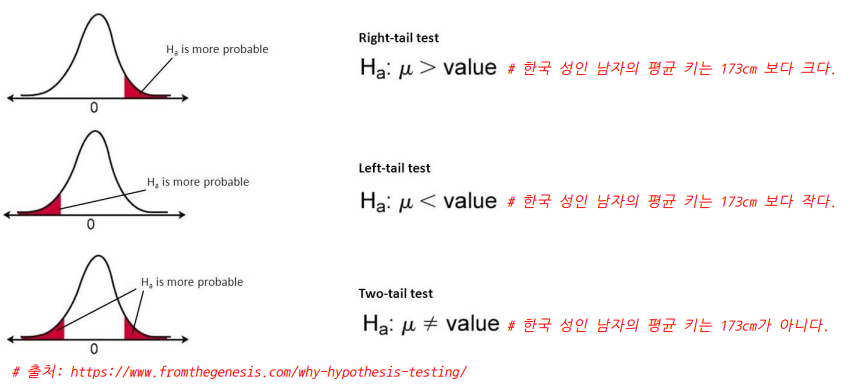

## 가설검정의 종류

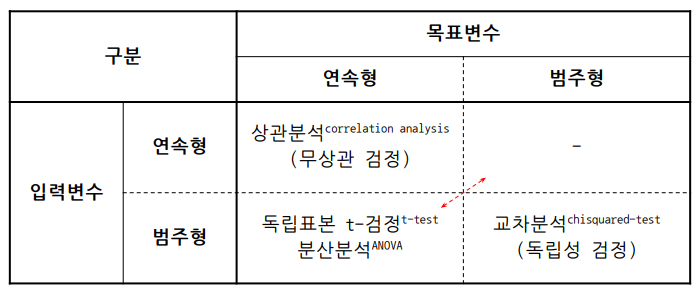

## 관련 라이브러리 호출

### ● 관련 라이브러리를 호출합니다

In [1]:
import os
import joblib
import numpy as np
import pandas as pd

### ● 실수를 출력할 소수점 자리수를 설정합니다

In [2]:
%precision 3
pd.options.display.precision = 3

### ● 통계 관련 라이브러리를 설치합니다

### ● 통계 관련 라이브러리를 호출합니다

In [18]:
from scipy import stats
import pingouin as pg
import scikit_posthocs as sp

## 작업 경로 확인 및 변경

### ● 현재 작업 경로를 확인합니다

In [3]:
os.getcwd()

'D:\\python\\PythonAdvanced-main\\code'

### ● data 폴더로 작업 경로를 변경합니다

In [4]:
os.chdir('../data')

### ● 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다

In [13]:
os.listdir()

['KBO_Hitter_2021.z',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z',
 'Used_Cars_Price_Prep.z']

## 실습 데이터셋 준비

### ● z 파일을 읽고 데이터프레임 df를 생성합니다

In [7]:
df = joblib.load(filename = 'Used_Cars_Price.z')

### ● df의 정보를 확인합니다

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1268 non-null   int64 
 1   Age        1268 non-null   int64 
 2   KM         1268 non-null   int64 
 3   FuelType   1268 non-null   object
 4   HP         1268 non-null   int64 
 5   MetColor   1268 non-null   object
 6   Automatic  1268 non-null   object
 7   CC         1268 non-null   int64 
 8   Doors      1268 non-null   int64 
 9   Weight     1268 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 99.2+ KB


### ● df의 처음 5행을 출력합니다

In [9]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


## 분산, 공분산 및 상관계수의 관계

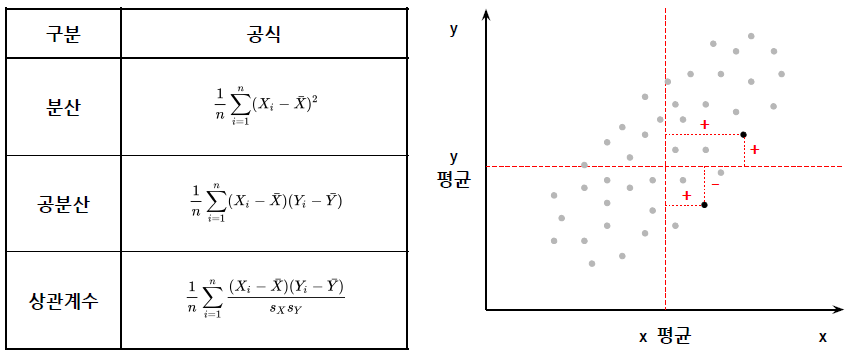

## 공분산

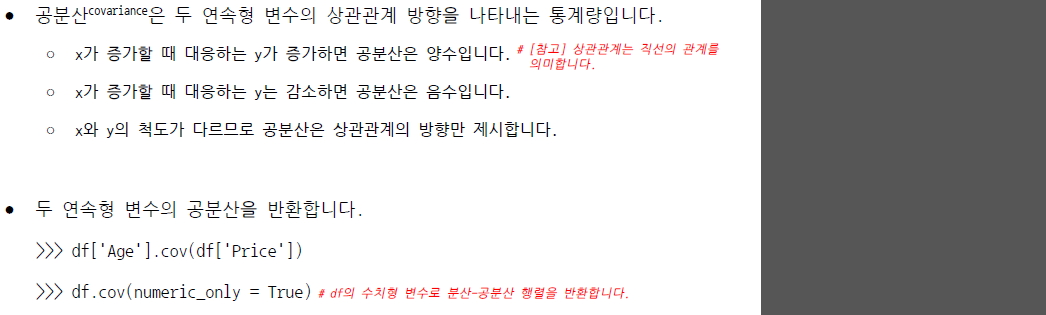

## 상관계수

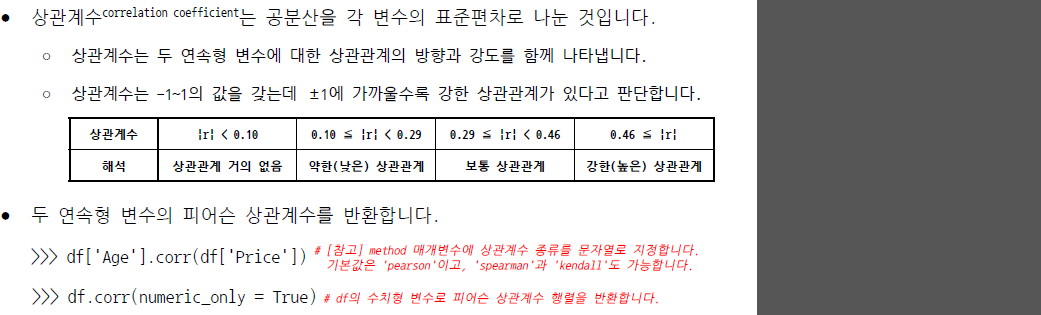

## [참고] 상관계수 관련 그래프

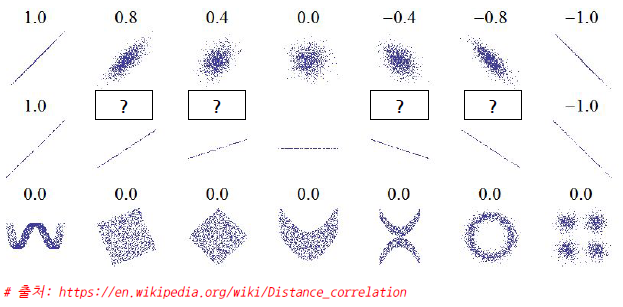

## 피어슨 상관분석

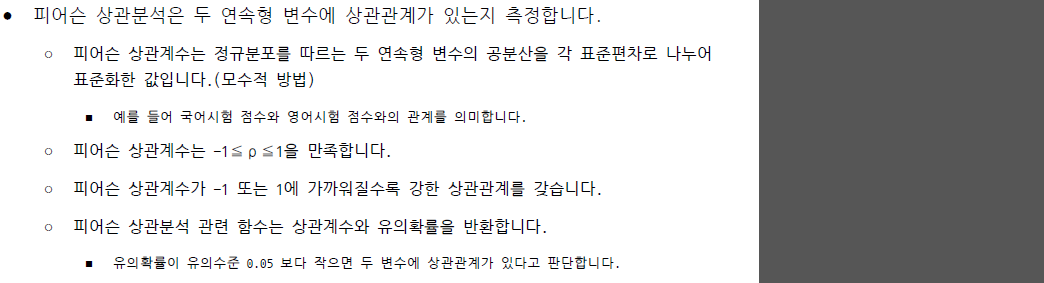

## 스피어만 상관분석

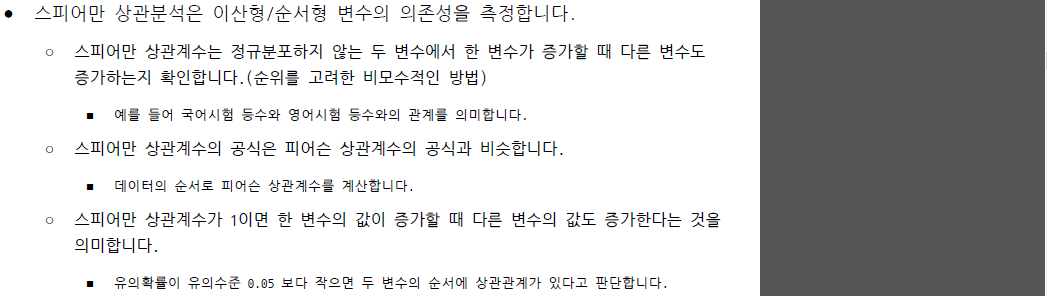

## 상관관계 vs 인과관계

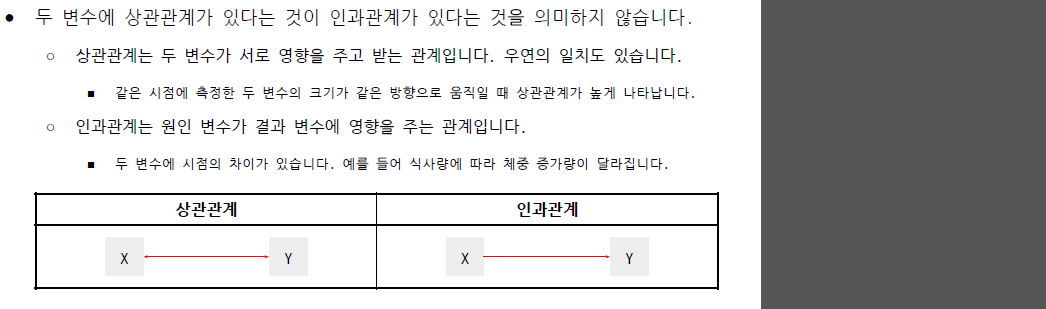

## [참고] 인과관계 판단 오류

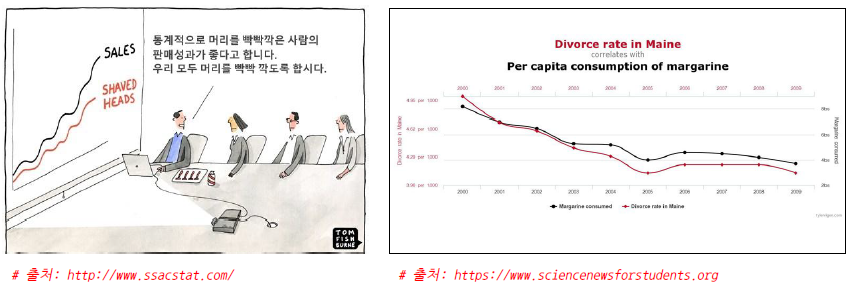

## 피어슨 상관분석의 가설 및 검정통계량

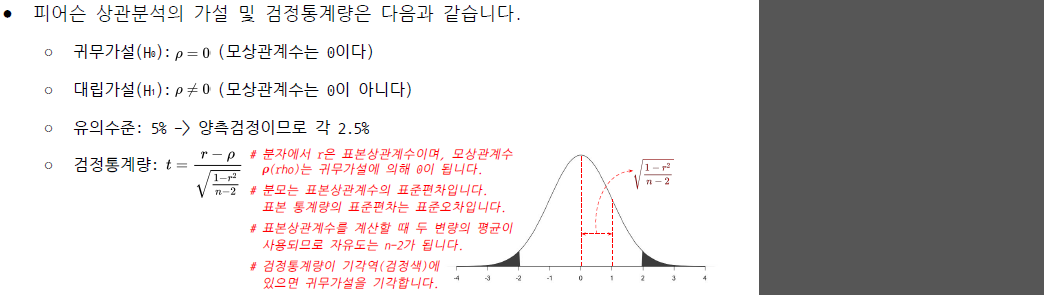

## 피어슨 상관분석

### ● 두 연속형 변수의 피어슨 상관분석을 실행하고 유의확률을 확인합니다

In [10]:
pg.corr(x = df['Age'], y = df['Price']) # method 매개변수의 기본 인수는 pearson'입니다.
# Age와 Price의 피어슨 상관분석을 실행하고 유의확률을 확인합니다.

NameError: name 'pg' is not defined

In [ ]:
r:상관계수 / power : 검정력 / p-val:p-value

In [32]:
pg.corr(x = df['KM'], y = df['Price']) # KM와 Price의 피어슨 상관분석을 실행하고 유의확률을 확인합니다.

,n,r,CI95%,p-val,BF10,power
pearson,1268,-0.515,"[-0.55, -0.47]",1.187e-86,9.482e+82,1.0


In [33]:
pg.corr(x = df['HP'], y = df['Price']) # HP와 Price의 피어슨 상관분석을 실행하고 유의확률을 확인합니다.

,n,r,CI95%,p-val,BF10,power
pearson,1268,0.222,"[0.17, 0.27]",1.289e-15,2.583e+12,1.0


In [34]:
pg.corr(x = df['CC'], y = df['Price']) # CC와 Price의 피어슨 상관분석을 실행하고 유의확률을 확인합니다.

,n,r,CI95%,p-val,BF10,power
pearson,1268,0.05,"[-0.0, 0.11]",0.072,0.176,0.435


In [35]:
pg.corr(x = df['Doors'], y = df['Price']) # Doors와 Price의 피어슨 상관분석을 실행하고 유의확률을 확인합니다.

,n,r,CI95%,p-val,BF10,power
pearson,1268,0.165,"[0.11, 0.22]",3.645e-09,1.245e+06,1.0


In [43]:
pg.corr(x = df['Weight'], y = df['Price']) # Weight와 Price의 피어슨 상관분석을 실행하고 유의확률을 확인합니다.

,n,r,CI95%,p-val,BF10,power
pearson,1268,0.221,"[0.17, 0.27]",1.863e-15,1.798e+12,1.0


## [참고] 피어슨 상관분석 유의확률 출력 함수 생성

### ● 변수 x에 df의 연속형 변수를 할당합니다

In [11]:
x = df['Age']

### ● 변수 x와 Price의 피어슨 상관분석 실행 결과에서 유의확률만 출력합니다

In [12]:
pg.corr(x = x, y = df['Price'])['p-val'] # Series가 됨

NameError: name 'pg' is not defined

### ● 연속형 입력변수와의 상관분석 유의확률을 출력하는 람다 표현식을 생성합니다

In [13]:
corr = lambda x: pg.corr(x = x, y = df['Price'])['p-val']

### ● 람다 표현식 함수로 피어슨 상관분석 유의확률을 출력합니다

In [49]:
def corr(x):
    return pg.corr(x = x, y = df['Price'])['p-val']

In [52]:
locs=df.dtypes.astype(str).isin(values=['int64', 'float'])

In [53]:
df.loc[:,locs].apply(func=corr)

,Price,Age,KM,HP,CC,Doors,Weight
pearson,0.0,5.880e-279,1.187e-86,1.289e-15,0.072,3.645e-09,1.863e-15


In [57]:
#• 람다 표현식 함수로 피어슨 상관분석 유의확률을 출력합니다.
corr(x = df['Age'])

pearson    5.880e-279
Name: p-val, dtype: float64

In [59]:
df.loc[:,locs].apply(func=lambda x: pg.corr(x = x, y = df['Price'])['r'])

,Price,Age,KM,HP,CC,Doors,Weight
pearson,1.0,-0.797,-0.515,0.222,0.05,0.165,0.221


## [참고] apply() 함수를 활용한 상관분석 실행

### ● df의 열별 자료형을 확인합니다

In [16]:
df.dtypes # [참고] Windows는 정수를 numpy.int32로 생성합니다.

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor     object
Automatic    object
CC            int64
Doors         int64
Weight        int64
dtype: object

### ● 열별 자료형이 정수형 또는 실수형이면 True, 아니면 False인 벡터를 생성합니다

In [15]:
locs = df.dtypes.astype(str).isin(values = ['float64', 'int64'])
locs

Price         True
Age           True
KM            True
FuelType     False
HP            True
MetColor     False
Automatic    False
CC            True
Doors         True
Weight        True
dtype: bool

### ● df의 정수형 또는 실수형 변수만 선택하여 상관분석을 실행하고 유의확률이 0.05보다 작은지 여부를 데이터
### 프레임으로 반환합니다

In [60]:
df.loc[:, locs].apply(func = corr).lt(0.05)

,Price,Age,KM,HP,CC,Doors,Weight
pearson,True,True,True,True,False,True,True


## t-검정의 종류

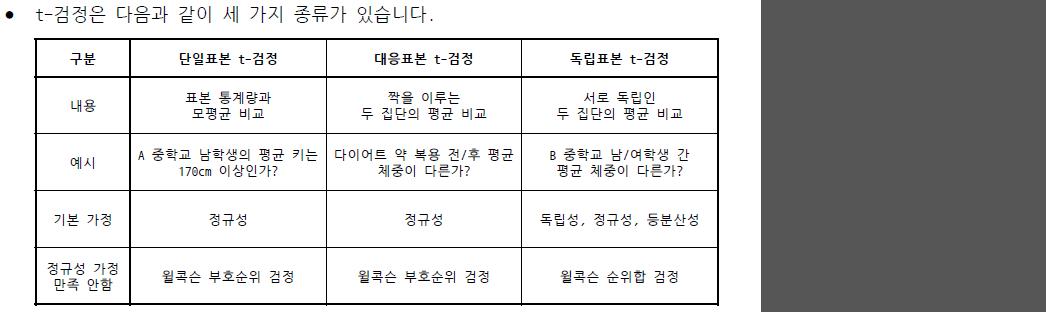

## 독립표본 t-검정

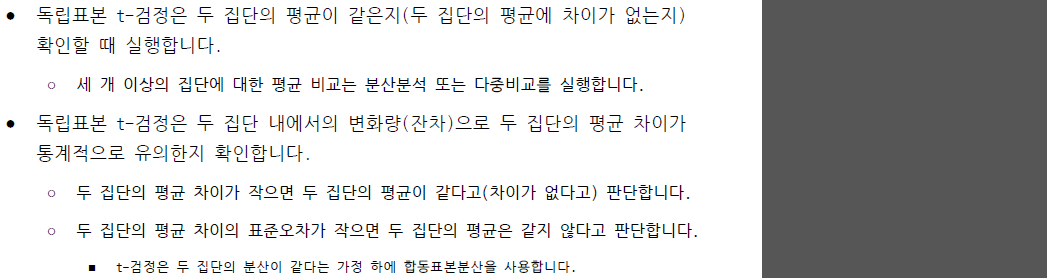

## [참고] t-검정 자료구조

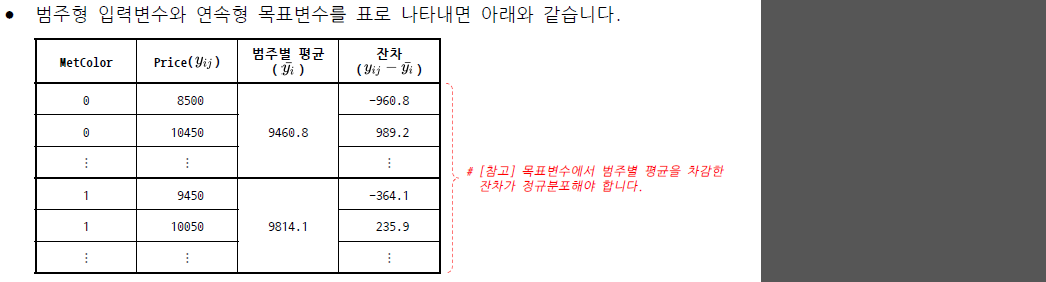

## 독립표본 t-검정의 가설 및 검정통계량

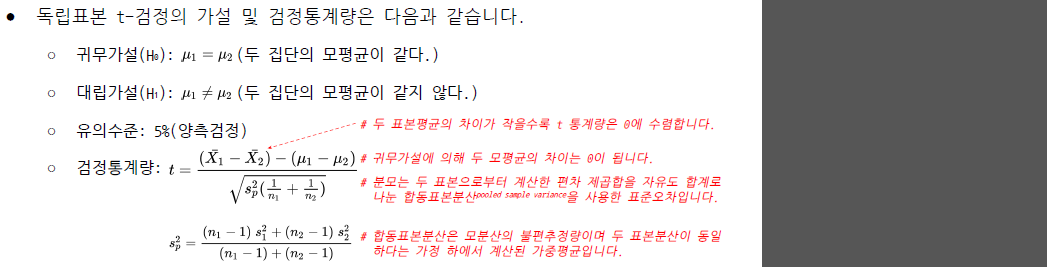

## 독립표본 t-검정의 가정

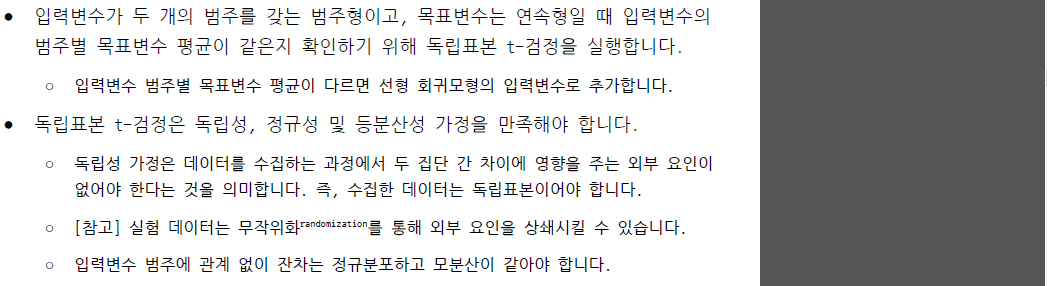

## 정규성 검정

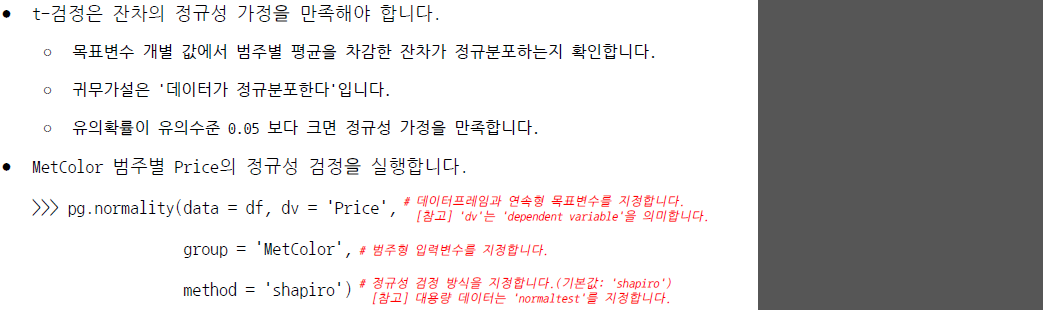

In [67]:
# MetColor 범주별 Price의 정규성 검정을 실행합니다.
pg.normality(data = df, dv = 'Price', group = 'MetColor', method = 'shapiro')

,W,pval,normal
1,0.975,7.077e-11,False
0,0.988,1.430e-03,False


## 등분산성 검정

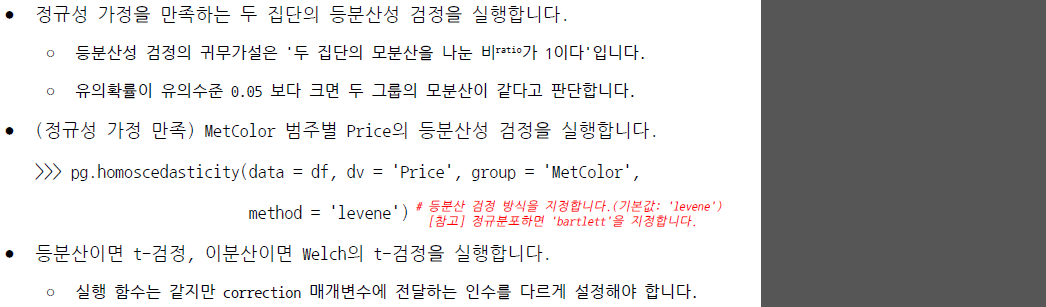

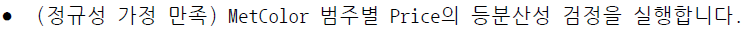

In [72]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'MetColor', method = 'levene')
# 등분산 검정 방식을 지정합니다.(기본값: 'levene')
# [참고] 청규분포하면 'bartlett'을 지정합니다.
# bartlett은 정규할 때만 쓸 수 있음 / levene : 정규하지 않을 때도 쓸 수 있음

,W,pval,equal_var
levene,5.761,0.017,False


In [ ]:
# False이므로 등분산하지 않는다! -> t-검정을 쓸 수 없다 -> welch t-검정을 써야함

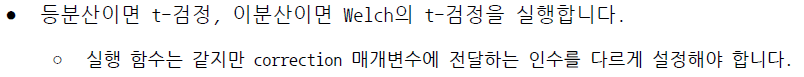

## 범주형 변수로 데이터프레임 분할

### ● MetColor 원소의 중복을 제거한 calues를 생성합니다

In [78]:
values = df['MetColor'].sort_values().unique()
values
# unique(중복을 제거)

array(['0', '1'], dtype=object)

### ● MetColor의 원소별 Price로 시리즈를 생성합니다

In [79]:
sp1, sp2 = [df['Price'][df['MetColor'].eq(v)] for v in values]

### ● 두 시리즈의 평균을 각각 확인합니다

In [75]:
print(sp1.mean())
print(sp2.mean())

9466.672897196262
9814.132142857143


## t-검정

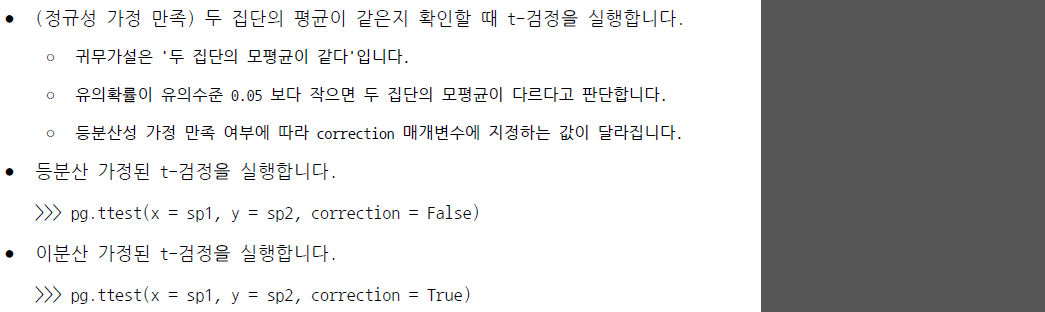

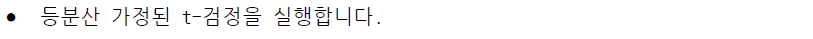

In [82]:
pg.ttest(x = sp1, y = sp2, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.892,1266,two-sided,0.004,"[-583.18, -111.73]",0.172,4.077,0.824


In [83]:
pg.ttest(x = sp1, y = sp2, correction = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.984,935.893,two-sided,0.003,"[-576.0, -118.92]",0.172,5.313,0.824


## 윌콕슨 순위합 검정 또는 맨-휘트니 U 검정

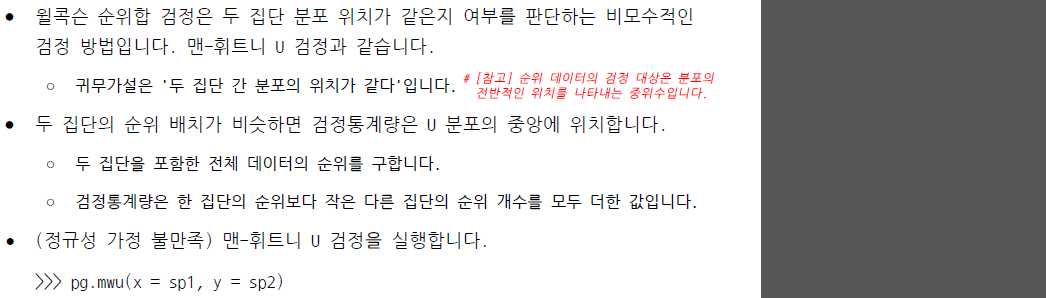

In [87]:
pg.mwu(x = sp1, y = sp2)

,U-val,alternative,p-val,RBC,CLES
MWU,166376.0,two-sided,0.03,0.074,0.463


In [88]:
from GraphicSetting import *

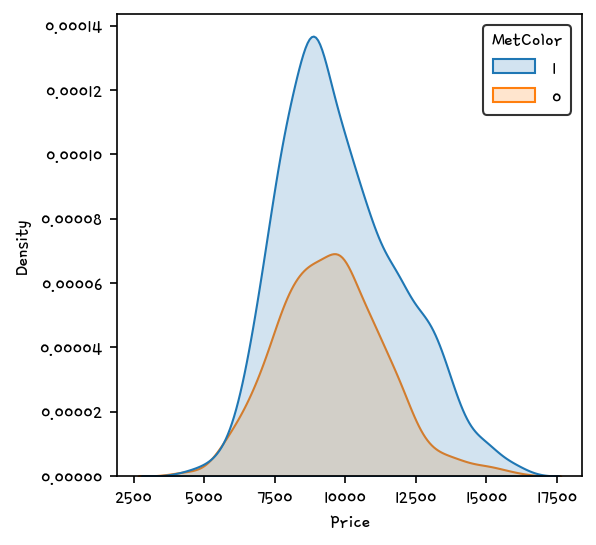

In [89]:
sns.kdeplot(data = df, x = 'Price', hue = 'MetColor', fill = True, alpha = 0.2);

## [참고] t-검정 프로세스

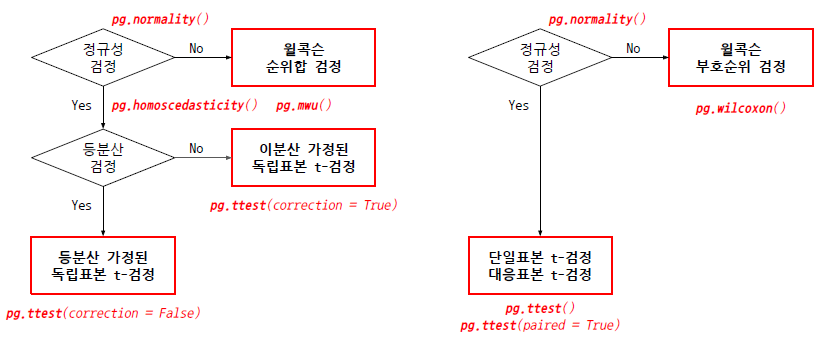

In [90]:
# (정규성 가정 만족) Automatic 범주별 Price의 등분산성 검정을 실행합니다.
pg.homoscedasticity(data = df, dv = 'Price', group = 'Automatic', method = 'levene')

,W,pval,equal_var
levene,1.093,0.296,True


In [91]:
# Automatic 원소의 중복을 제거한 values를 생성합니다.
values = df['Automatic'].sort_values().unique()
values

array(['0', '1'], dtype=object)

In [92]:
# Automatic 범주별 Price로 시리즈를 생성합니다.
sp1, sp2 = [df['Price'][df['Automatic'].eq(v)] for v in values]

In [93]:
# 두 시리즈의 평균을 확인합니다.
print(sp1.mean())
print(sp2.mean())

9676.575125208681
10043.857142857143


In [94]:
# 등분산 가정된 t-검정을 실행합니다.
pg.ttest(x = sp1, y = sp2, correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.473,1266,two-sided,0.141,"[-856.55, 121.99]",0.181,0.377,0.313


In [95]:
# 이분산 가정된 t-검정을 실행합니다.
pg.ttest(x = sp1, y = sp2, correction = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.568,78.571,two-sided,0.121,"[-833.65, 99.08]",0.181,0.433,0.313


In [96]:
# (정규성 가정 불만족) 맨-휘트니 U 검정을 실행합니다.
pg.mwu(x = sp1, y = sp2)

,U-val,alternative,p-val,RBC,CLES
MWU,37216.5,two-sided,0.113,0.112,0.444


## 분산분석

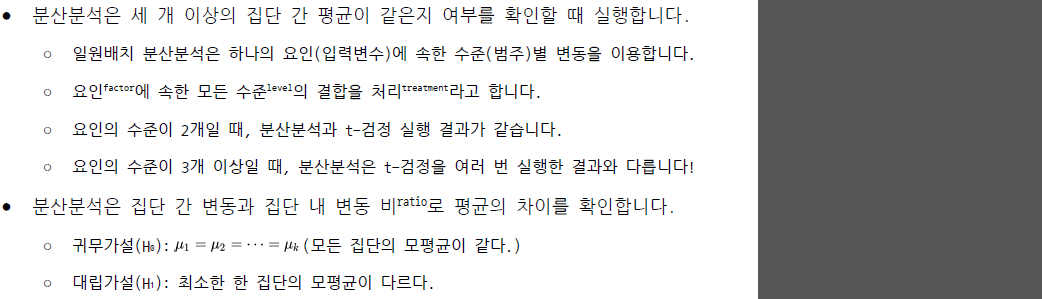

## [참고] 분산분석 자료구조

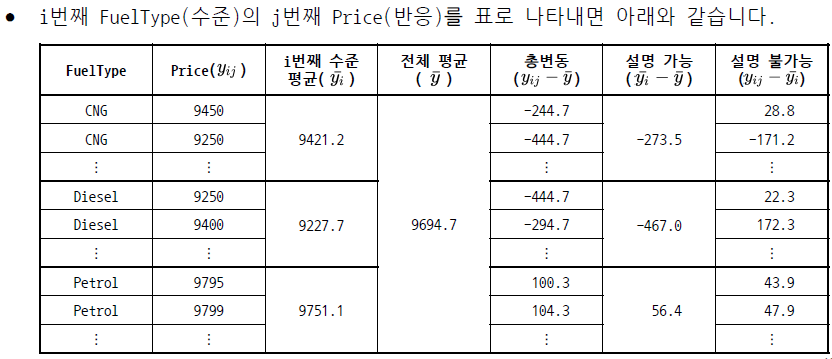

## 분산분석표

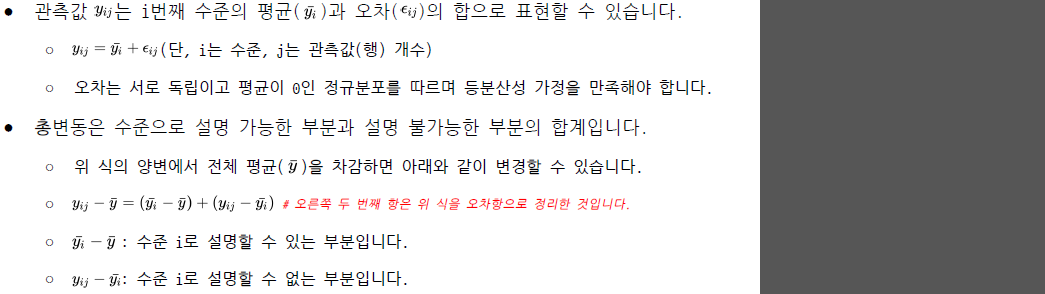

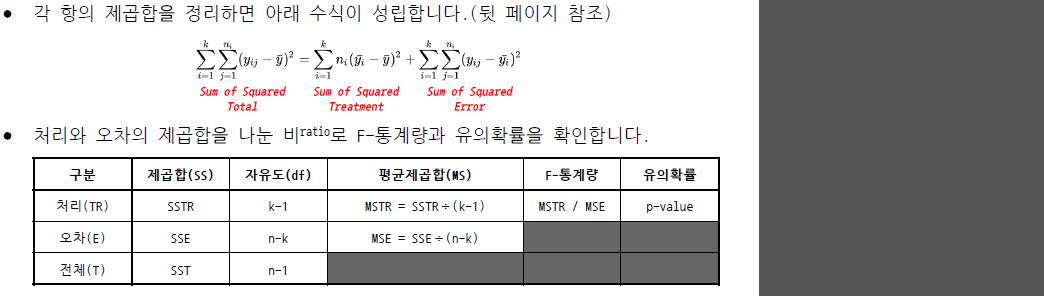

In [ ]:
(위의 식이 의미하는 것) 총변동 = 설명가능한 부분 + 설명 불가능한 부분
총변동 = 분산
설명가능한 부분 : CNG, Diesel, petrol

## [참고] 분산분석 증명

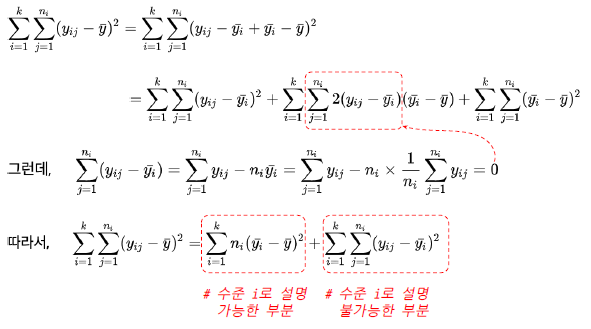

## 분산분석의 가정

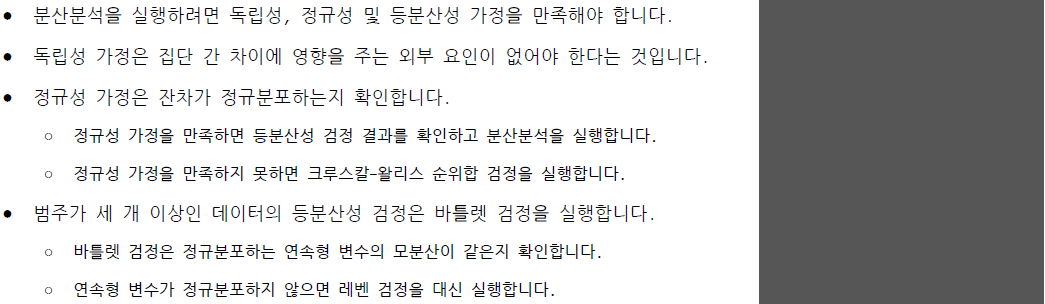

## 정규성 검정

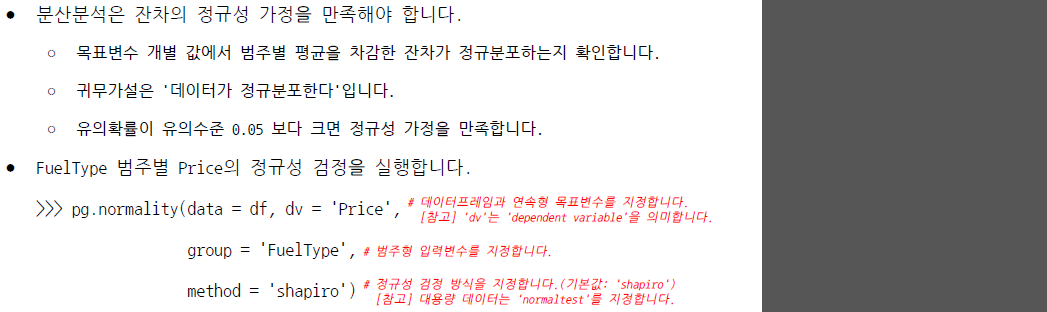

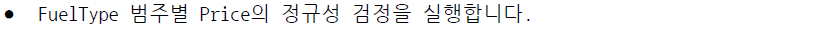

In [101]:
pg.normality(data = df, dv = 'Price', # 데이터프레임과 연속형 목표변수를 지정합니다.
                                      # [참고] 'dv'는 'dependent variable'을 의미합니다.
             group = 'FuelType',  # 범주형 입력변수를 지정합니다.
             method = 'shapiro')  # 정규성 검정 방식을 지정합니다.(기본값: 'shapiro')
                                  # [참고] 대용량 데이터는 'normaltest'를 지정합니다.

,W,pval,normal
Diesel,0.956,4.250e-04,False
Petrol,0.978,5.504e-12,False
CNG,0.952,4.957e-01,True


## 등분산성 검정

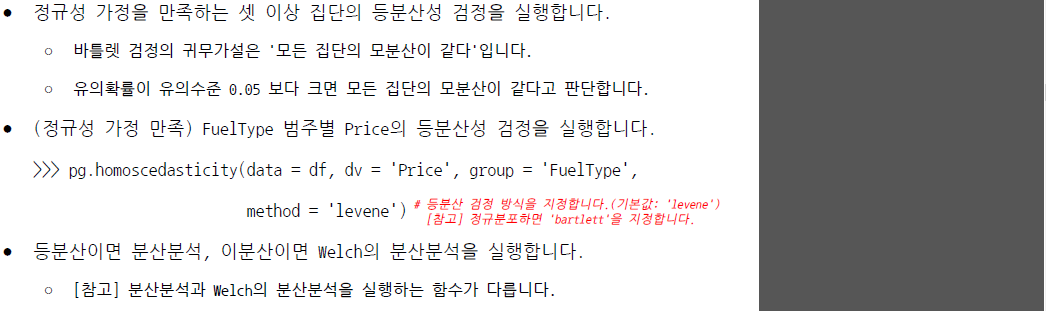

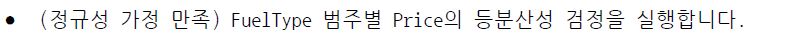

In [102]:
pg.homoscedasticity(data = df, dv = 'Price', group = 'FuelType', method = 'levene')
# 등분산 검정 방식을 지정합니다.(기본값: 'levene')
# [참고] 정규분포하면 'bartlett'을 지정합니다.

,W,pval,equal_var
levene,6.498,0.002,False


## 분산분석

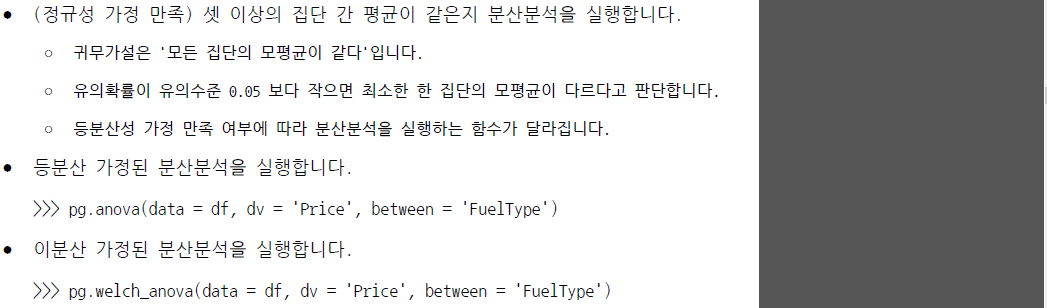

In [103]:
# 등분산 가정된 분산분석을 실행합니다.
pg.anova(data = df, dv = 'Price', between = 'FuelType') # dv:dependance variable

,Source,ddof1,ddof2,F,p-unc,np2
0,FuelType,2,1265,3.983,0.019,0.006


In [98]:
# 이분산 가정된 분산분석을 실행합니다.
pg.welch_anova(data = df, dv = 'Price', between = 'FuelType')

,Source,ddof1,ddof2,F,p-unc,np2
0,FuelType,2,38.942,2.612,0.086,0.006


## 크루스칼-왈리스 검정

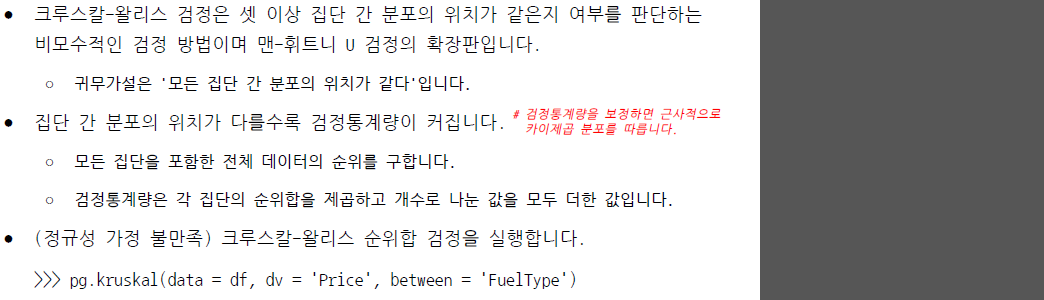

In [99]:
# (정규성 가정 불만족) 크루스칼-왈리스 순위합 검정을 실행합니다.
pg.kruskal(data = df, dv = 'Price', between = 'FuelType')

,Source,ddof1,H,p-unc
Kruskal,FuelType,2,10.475,0.005


## [참고] 검정을 반복하면 안되는 이유

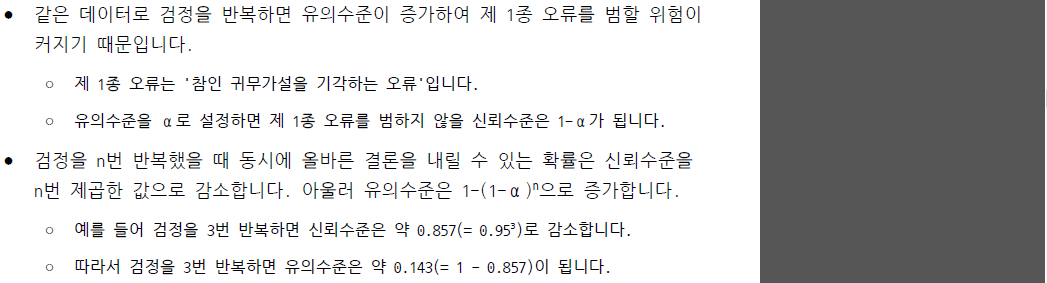

## 사후분석(다중비교)

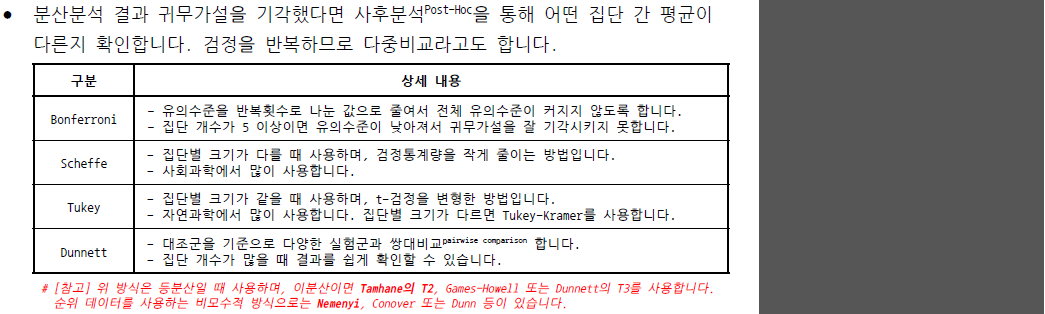

## ● 사후분석(다중비교) 실행

### ● 다양한 사후분석을 실행하고 유의확률을 확인합니다

In [108]:
# Bonferroni 방법으로 사후분석을 실행합니다.
sp.posthoc_ttest(a = df, val_col = 'Price', group_col = 'FuelType', p_adjust = 'bonferroni')

,Diesel,Petrol,CNG
Diesel,1.000,0.017,1.0
Petrol,0.017,1.000,1.0
CNG,1.000,1.000,1.0


In [109]:
# Tukey 방법으로 사후분석을 실행합니다.
sp.posthoc_tukey(a = df, val_col = 'Price', group_col = 'FuelType')

,Diesel,Petrol,CNG
Diesel,1.000,0.016,0.900
Petrol,0.016,1.000,0.759
CNG,0.900,0.759,1.000


In [110]:
# Scheffe 방법으로 사후분석을 실행합니다.
sp.posthoc_scheffe(a = df, val_col = 'Price', group_col = 'FuelType')

,Diesel,Petrol,CNG
Diesel,1.000,0.022,0.934
Petrol,0.022,1.000,0.798
CNG,0.934,0.798,1.000


In [111]:
# Tamhane 방법으로 사후분석을 실행합니다.
sp.posthoc_tamhane(a = df, val_col = 'Price', group_col = 'FuelType')

,Diesel,Petrol,CNG
Diesel,1.000,0.076,0.987
Petrol,0.076,1.000,0.932
CNG,0.987,0.932,1.000


In [112]:
# Nemenyi 방법으로 사후분석을 실행합니다.
sp.posthoc_nemenyi(a = df, val_col = 'Price', group_col = 'FuelType')

,CNG,Diesel,Petrol
CNG,1.000,0.954,0.676
Diesel,0.954,1.000,0.007
Petrol,0.676,0.007,1.000


## [참고] 분산분석 프로세스

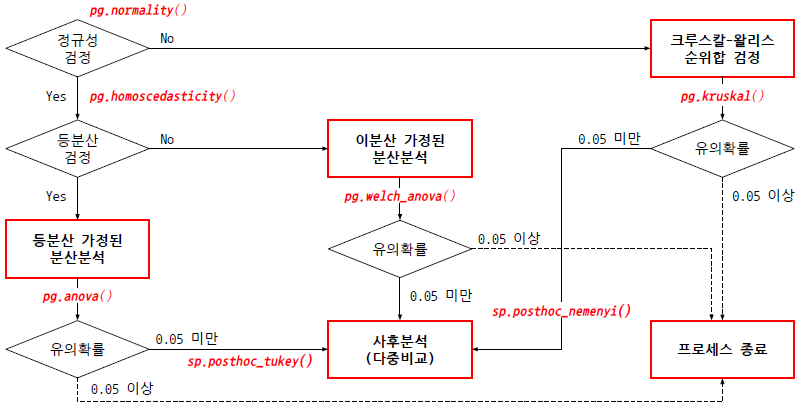

## 교차분석: 카이제곱 검정

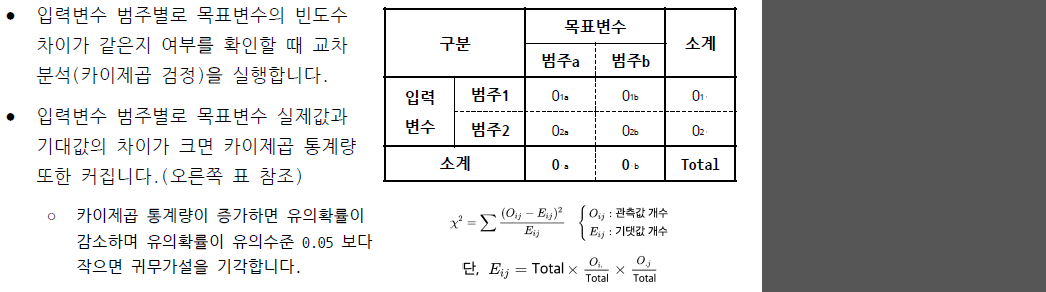

## 교차테이블 출력

### ● 두 번주형 변수의 빈도수를 출력합니다

In [116]:
pd.crosstab(index = df['MetColor'], columns = df['Automatic']) # [참고] index 매개변수에 입력변수, columns 매개변수에 목표변수를 각각
# 지정하면 결과를 해석하기 좋습니다.

Automatic,0,1
MetColor,,
0,398,26
1,784,43


### ● 두 범주형 변수의 상대도수를 출력합니다

In [132]:
# 두 범주형 변수의 상대도수를 출력합니다.
pd.crosstab(index = df['MetColor'], 
            columns = df['Automatic'], 
            normalize = 'index', # normalize 매개변수에 'index'를 지정하면 각 행별 
                                 # 합계가 1이 되도록 상대도수를 반환합니다.
            margins = True) # margins 매개변수에 True를 지정하면 맨 아래에 합계를 추가합니다.
                             # [참고] normalize 매개변수에 지정한 값에 따라 결과가 달라집니다.

KeyError: 'Automatic'

## 카이제곱 검정

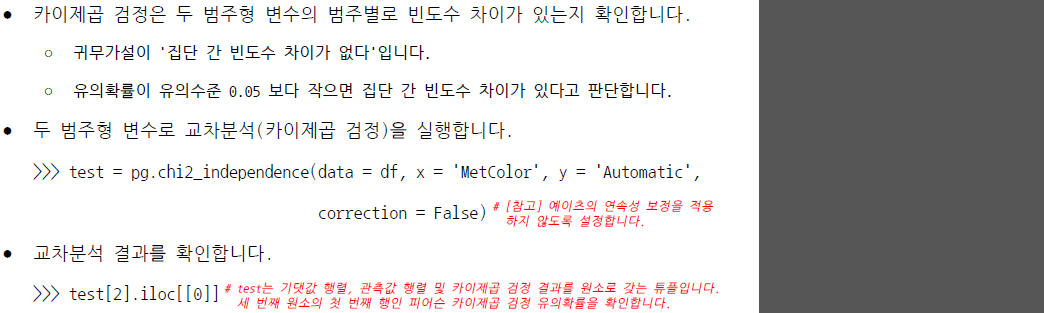

## [참고] 피셔의 정확검정

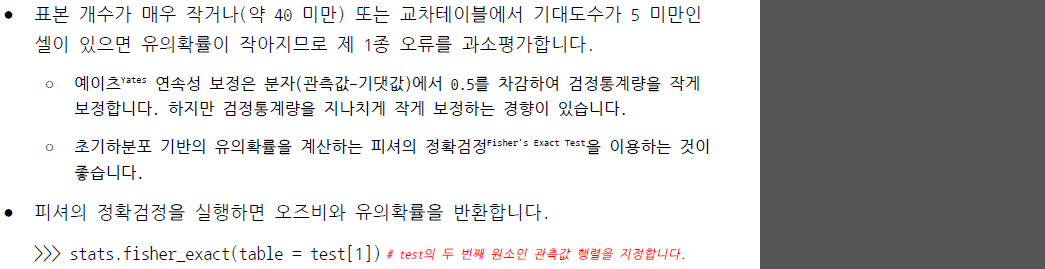

## 변수 제거 및 압축 파일로 저장

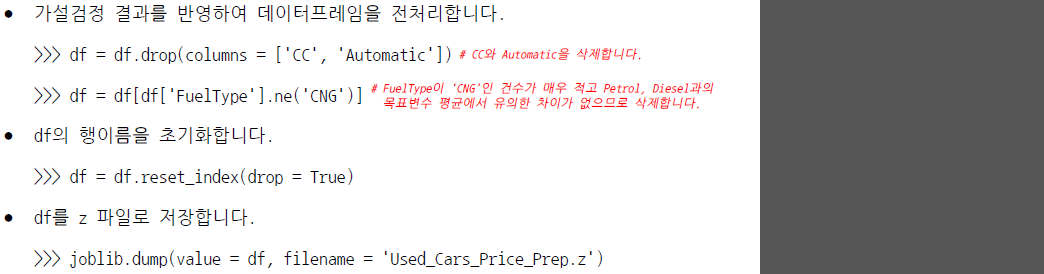

## End of Document